### Условия
Задача 5. Оптимизация параметров системы дифференциальных уравнений, описывающей боевые потери при борьбе регулярных частей с партизанами

⦁	Закодировать в электронной таблице Excel численную схему интегрирования системы дифференциальных уравнений, описывающей боевые потери при борьбе регулярных частей с партизанами (модифицировать решение задачи 3). Интегрируемая система имеет вид: 
dx(t)/dt = - k1 x(t)y(t),
dy(t)/dt = - k2 x(t),
где x(t) - численность партизан, y(t) - численность регулярных частей,  k1 - коэффициент, характеризующий эффективность действий регулярных частей, k2 - коэффициент, характеризующий эффективность действий партизан. Рекомендуемые значения параметров: k1=0.1, k2=0.8, x(0)=1, y(0)=3, шаг интегрирования = 0.01. Образец решения прилагается (см. файл КМ Блок 6-7 Задача 5). 

⦁	Используя численную оптимизацию, определить коэффициент k1 и численность регулярных частей y(0), необходимые для полного уничтожения партизан в момент времени t=3. (k1 и y(0) полагаются свободными параметрами, значения остальных параметров - те же, что и в задаче 5.1: k2=0.8, x(0)=1.) 

⦁	Используя численную оптимизацию, определить численность регулярных частей y(0), необходимую для полного уничтожения партизан в момент времени t=3. (Начальная численность регулярных частей y(0) полагается свободным параметром, значения остальных параметров - те же, что и в задаче 5.1: k1=0.1, k2=0.8, x(0)=1.) Сопоставить результаты решения задач 5.2 и 5.3.

### Шаг 1: Численного решения системы дифференциальных уравнений
#### Задача 5.1: Используем метод Эйлера

Во-первых, начнем с численного решения системы дифференциальных уравнений. Мы будем использовать метод Эйлера для решения дифференциальных уравнений. 

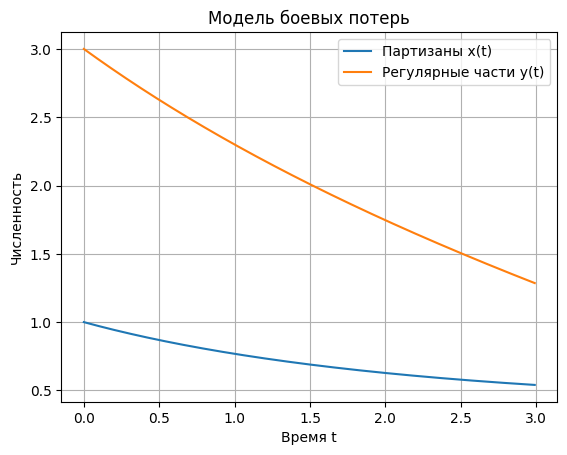

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# параметры
k1 = 0.1
k2 = 0.8
x0 = 1
y0 = 3
t_max = 3
dt = 0.01

# массивы для хранения численных решений
t_values = np.arange(0, t_max, dt)
x_values = np.zeros(len(t_values))
y_values = np.zeros(len(t_values))

# начальные условия
x_values[0] = x0
y_values[0] = y0

# метод Эйлера
for i in range(1, len(t_values)):
    x_values[i] = x_values[i-1] - k1 * x_values[i-1] * y_values[i-1] * dt
    y_values[i] = y_values[i-1] - k2 * x_values[i-1] * dt

# график
plt.plot(t_values, x_values, label='Партизаны x(t)')
plt.plot(t_values, y_values, label='Регулярные части y(t)')
plt.xlabel('Время t')
plt.ylabel('Численность')
plt.legend()
plt.title('Модель боевых потерь')
plt.grid()
plt.show()

### Шаг 2: Оптимизация параметров

Для численной оптимизации мы можем использовать метод scipy.optimize.minimize.

#### Задача 5.2: Оптимизация $k_{1}$ и $y(0)$

In [2]:
from scipy.optimize import minimize

def loss(params):
    k1, y0 = params
    x = x0
    y = y0
    for _ in range(int(t_max / dt)):
        x_new = x - k1 * x * y * dt
        y_new = y - k2 * x * dt
        x, y = x_new, y_new
        if x <= 0:
            return abs(t_max - (_ * dt))
    return abs(x)

# начальные параметры для оптимизации
initial_params = [0.1, 3]
result = minimize(loss, initial_params, method='Nelder-Mead')

optimal_k1, optimal_y0 = result.x
print(f"Оптимальные значения k1: {optimal_k1}, начальная численность регулярных частей y0: {optimal_y0}")

Оптимальные значения k1: 0.7927307891845546, начальная численность регулярных частей y0: 115.65101394653428


#### Задача 5.3: Оптимизация $y(0)$

Теперь зафиксируем $k_{1}$ и найдем оптимальное $y(0)$.

In [3]:
def loss_y0(y0):
    x = x0
    y = y0
    for _ in range(int(t_max / dt)):
        x_new = x - k1 * x * y * dt
        y_new = y - k2 * x * dt
        x, y = x_new, y_new
        if x <= 0:
            return abs(t_max - (_ * dt))
    return abs(x)

# начальные параметры для оптимизации
initial_y0 = 3
result_y0 = minimize(loss_y0, initial_y0, method='Nelder-Mead')

optimal_y0_5_3 = result_y0.x[0]
print(f"Оптимальная начальная численность регулярных частей y0: {optimal_y0_5_3}")

Оптимальная начальная численность регулярных частей y0: 962.845312500003


### Шаг 3: Сравнение результатов

In [4]:
print(f"Оптимальные значения k1: {optimal_k1}, начальная численность регулярных частей y0 (задача 5.2): {optimal_y0}")
print(f"Оптимальная начальная численность регулярных частей y0 (задача 5.3): {optimal_y0_5_3}")

Оптимальные значения k1: 0.7927307891845546, начальная численность регулярных частей y0 (задача 5.2): 115.65101394653428
Оптимальная начальная численность регулярных частей y0 (задача 5.3): 962.845312500003
